### Tiara Experiments:

In [1]:
from fit_model import *

#### Model 1:
###### Version 1:
    Using an Embedding layer and 2 Bidirectional GRU layers, with learning rate of 0.005 and 64 units for each output length of the layers.

In [2]:
def define_model_1(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
	model = Sequential()
	model.add(Embedding(src_vocab, n_units, input_length=src_timesteps, mask_zero=True)) 
	model.add(Bidirectional(GRU(n_units)))
	model.add(RepeatVector(tar_timesteps))
	model.add(Bidirectional(GRU(n_units, return_sequences=True)))
	#model.add(LSTM(n_units, return_sequences=True))
	model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
	return model

In [3]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', 'dataset/english-spanish-train-10000.txt','dataset/english-spanish-test-10000.txt'
units = 64
learning_rate = 0.005
loss_func='sparse_categorical_crossentropy'
epochs=100
batch_size=64
model_save_file_name='Models/tr_model_1_1.h5'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 5, 64)             145408    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               49920     
_________________________________________________________________
repeat_vector (RepeatVector) (None, 8, 128)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 8, 128)            74496     
_________________________________________________________________
time_distributed (TimeDistri (None, 8, 4510)           581790    
Total params: 851,614
Trainable params: 851,614
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
125/125 - 22s - loss: 3.1957 - acc: 0.6388 - val_loss: 2.6419 - val_acc: 0.6475

Epoch 00001: val_l

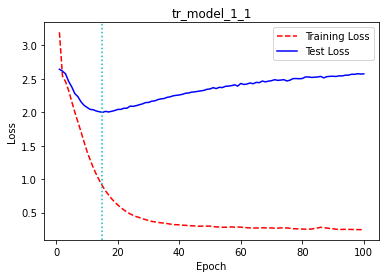

In [5]:
model_history_save_file_name ='model_history/history_model_1_1.npy'
model1_1 = define_model_1(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model1_1,loss_func,learning_rate)
plot_model(model1_1, to_file='model_images/tr_model_1_1_m.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model1_1, model_save_file_name,model_history_save_file_name)
graph_loss_vs_epochs(model1_1.history, 'loss_vs_epochs_images/tr_model_1_1_le.png', 'tr_model_1_1')

###### Version 2:
    Using an Embedding layer and 2 Bidirectional GRU layers, with learning rate of 0.001 and 128 units for each output length of the layers.

In [6]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', 'dataset/english-spanish-train-10000.txt','dataset/english-spanish-test-10000.txt'
units = 128
learning_rate = 0.001
loss_func='sparse_categorical_crossentropy'
epochs = 100
batch_size=32
model_save_file_name='Models/tr_model_1_2.h5'

print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(8000, 5) (8000, 8) (2000, 5) (2000, 8)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 5, 128)            290816    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 256)               198144    
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 8, 256)            0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 8, 256)            296448    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 8, 4510)           1159070   
Total params: 1,944,478
Trainable params: 1,944,478
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
250/250 - 25s - loss: 3.1138 - acc: 0.6424 - val_loss: 2.5927 - val_acc: 0.6521

Epoch 00001:

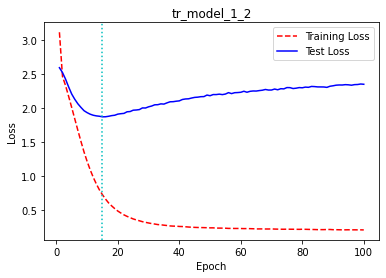

In [7]:
model_history_save_file_name ='model_history/history_model_1_2.npy'
model1_2 = define_model_1(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model1_2,loss_func,learning_rate)
plot_model(model1_2, to_file='model_images/tr_model_1_2_m.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model1_2, model_save_file_name,model_history_save_file_name)
graph_loss_vs_epochs(model1_2.history, 'loss_vs_epochs_images/tr_model_1_2_le.png', 'tr_model_1_2')

###### Version 3:
    Using an Embedding layer and 2 Bidirectional layers, one a SimpleRNN and the other LSTM, with learning rate of 0.008 and 256 units for each output length of the layers.

In [9]:
def define_model_1_3(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
	model = Sequential()
	model.add(Embedding(src_vocab, n_units, input_length=src_timesteps, mask_zero=True)) 
	model.add(Bidirectional(SimpleRNN(n_units)))
	model.add(RepeatVector(tar_timesteps))
	model.add(Bidirectional(LSTM(n_units, return_sequences=True)))
	model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
	return model

In [10]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', 'dataset/english-spanish-train-10000.txt','dataset/english-spanish-test-10000.txt'
units = 256
learning_rate = 0.008
loss_func='sparse_categorical_crossentropy'
epochs = 100
batch_size = 64
model_save_file_name='Models/tr_model_1_3.h5'

testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(8000, 5) (8000, 8) (2000, 5) (2000, 8)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 5, 256)            581632    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 512)               262656    
_________________________________________________________________
repeat_vector_2 (RepeatVecto (None, 8, 512)            0         
_________________________________________________________________
bidirectional_5 (Bidirection (None, 8, 512)            1574912   
_________________________________________________________________
time_distributed_2 (TimeDist (None, 8, 4510)           2313630   
Total params: 4,732,830
Trainable params: 4,732,830
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
125/125 - 33s - loss: 2.9753 - acc: 0.6380 - val_loss: 2.6216 - val_acc: 0.6523

Epoch 00001:

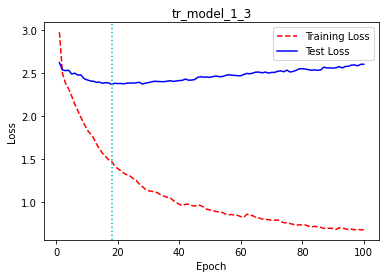

In [11]:
model_history_save_file_name ='model_history/history_model_1_3.npy'
model1_3 = define_model_1_3(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model1_3,loss_func,learning_rate)
plot_model(model1_3, to_file='model_images/tr_model_1_3_m.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model1_3, model_save_file_name,model_history_save_file_name)
graph_loss_vs_epochs(model1_3.history, 'loss_vs_epochs_images/tr_model_1_3_le.png', 'tr_model_1_3')

#### Model 2:
###### Version 1:
    An Embedding layer, 2 Bidirectional GRU layers, a Fully-connected layer with relu activation function, and a dropout layer with 0.5 probability, using 128 as unit for output layer sizes, learning rate of 0.001

In [12]:
def define_model_2(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
	model = Sequential()
	model.add(Embedding(src_vocab, n_units, input_length=src_timesteps, mask_zero=True)) 
	model.add(Bidirectional(GRU(n_units)))
	model.add(RepeatVector(tar_timesteps))
	model.add(Bidirectional(GRU(n_units, return_sequences=True)))
	model.add(TimeDistributed(Dense(n_units, activation='relu')))
	model.add(Dropout(0.5))
	model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
	return model

In [13]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', 'dataset/english-spanish-train-10000.txt','dataset/english-spanish-test-10000.txt'
units = 128
learning_rate = 0.001
loss_func='sparse_categorical_crossentropy'
epochs = 100
batch_size=32
model_save_file_name='Models/tr_model_2_1.h5'

print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(8000, 5) (8000, 8) (2000, 5) (2000, 8)


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 5, 128)            290816    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 256)               198144    
_________________________________________________________________
repeat_vector_3 (RepeatVecto (None, 8, 256)            0         
_________________________________________________________________
bidirectional_7 (Bidirection (None, 8, 256)            296448    
_________________________________________________________________
time_distributed_3 (TimeDist (None, 8, 128)            32896     
_________________________________________________________________
dropout (Dropout)            (None, 8, 128)            0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, 8, 4510)          

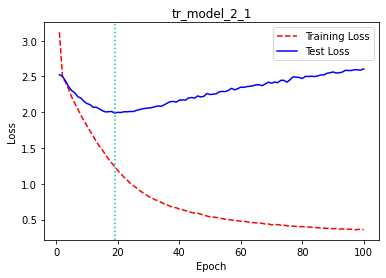

In [14]:
model_history_save_file_name ='model_history/history_model_2_1.npy'
model2_1 = define_model_2(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model2_1,loss_func,learning_rate)
plot_model(model2_1, to_file='model_images/tr_model_2_1_m.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model2_1, model_save_file_name,model_history_save_file_name)
graph_loss_vs_epochs(model2_1.history, 'loss_vs_epochs_images/tr_model_2_1_le.png', 'tr_model_2_1')

###### Version 2:
    An Embedding layer, 2 Bidirectional GRU layers, a Fully-connected layer with relu activation function, and a dropout layer with 0.5 probability BETWEEN each layer, using 256 as units for output layer sizes, learning rate of 0.001

In [15]:
def define_model_2_2(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
    model = Sequential()
    model.add(Embedding(src_vocab, n_units, input_length=src_timesteps, mask_zero=True)) 
    model.add(Bidirectional(GRU(n_units)))
    model.add(Dropout(0.5))
    model.add(RepeatVector(tar_timesteps))
    model.add(Bidirectional(GRU(n_units, return_sequences=True)))
    model.add(Dropout(0.5))
    model.add(TimeDistributed(Dense(n_units, activation='relu')))
    model.add(Dropout(0.5))
    model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
    return model

In [16]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', 'dataset/english-spanish-train-10000.txt','dataset/english-spanish-test-10000.txt'
units = 256
learning_rate = 0.001
loss_func='sparse_categorical_crossentropy'
epochs = 100
batch_size = 128
model_save_file_name='Models/tr_model_2_2.h5'

print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(8000, 5) (8000, 8) (2000, 5) (2000, 8)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 5, 256)            581632    
_________________________________________________________________
bidirectional_8 (Bidirection (None, 512)               789504    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
repeat_vector_4 (RepeatVecto (None, 8, 512)            0         
_________________________________________________________________
bidirectional_9 (Bidirection (None, 8, 512)            1182720   
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 512)            0         
_________________________________________________________________
time_distributed_5 (TimeDist (None, 8, 256)           

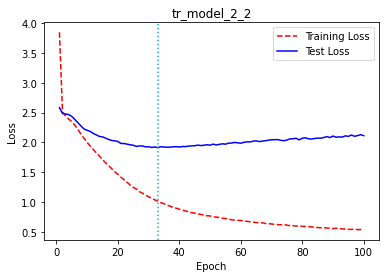

In [17]:
model_history_save_file_name ='model_history/history_model_2_2.npy'
model2_2 = define_model_2_2(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model2_2,loss_func,learning_rate)
plot_model(model2_2, to_file='model_images/tr_model_2_2_m.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model2_2, model_save_file_name,model_history_save_file_name)
graph_loss_vs_epochs(model2_2.history, 'loss_vs_epochs_images/tr_model_2_2_le.png', 'tr_model_2_2')

###### Version 3:
    An Embedding layer, 2 Bidirectional SimpleRNN layers with relu activation function, a Fully-connected layer with relu activation function, and a dropout layer BETWEEN each layer with 0.5 probability, using 1256 as units for output layer sizes, learning rate of 0.001

In [24]:
def define_model_2_3(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
    model = Sequential()
    model.add(Embedding(src_vocab, n_units, input_length=src_timesteps, mask_zero=True)) 
    model.add(Bidirectional(SimpleRNN(n_units, activation='relu')))
    model.add(Dropout(0.5))
    model.add(RepeatVector(tar_timesteps))
    model.add(Bidirectional(SimpleRNN(128,activation='relu', return_sequences=True)))
    model.add(Dropout(0.5))
    model.add(TimeDistributed(Dense(64, activation='relu')))
    model.add(Dropout(0.5))
    model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
    return model

In [28]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', 'dataset/english-spanish-train-10000.txt','dataset/english-spanish-test-10000.txt'
units = 256
learning_rate = 0.001
loss_func='sparse_categorical_crossentropy'
epochs = 100
batch_size = 128
model_save_file_name='Models/tr_model_2_3.h5'

print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(8000, 5) (8000, 8) (2000, 5) (2000, 8)


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 5, 256)            581632    
_________________________________________________________________
bidirectional_14 (Bidirectio (None, 512)               262656    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
repeat_vector_7 (RepeatVecto (None, 8, 512)            0         
_________________________________________________________________
bidirectional_15 (Bidirectio (None, 8, 256)            164096    
_________________________________________________________________
dropout_11 (Dropout)         (None, 8, 256)            0         
_________________________________________________________________
time_distributed_11 (TimeDis (None, 8, 64)            

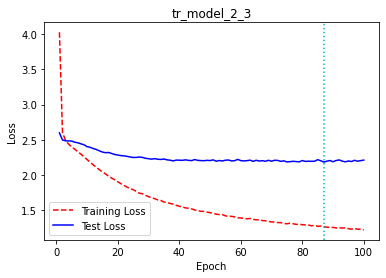

In [29]:
model_history_save_file_name ='model_history/history_model_2_3.npy'
model2_3 = define_model_2_3(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model2_3,loss_func,learning_rate)
plot_model(model2_3, to_file='model_images/tr_model_2_3_m.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model2_3, model_save_file_name,model_history_save_file_name)
graph_loss_vs_epochs(model2_3.history, 'loss_vs_epochs_images/tr_model_2_3_le.png', 'tr_model_2_3')

#### Model 3:
##### Version 1:
    An Embedding layer, 1 Bidirectional GRU layer with relu activation function, using 128 as units for output layer sizes, learning rate of 0.003
##### Version 2:
    An Embedding layer, 1 Bidirectional GRU layer with relu activation function, a fully connected layer, with 1024 units, and a dropout layer with 0.5 probability before the ouput layer, using a learning rate of 0.003
##### Version 3:
    An Embedding layer, 1 Bidirectional LSTM layer of 64 units, using 128 as units for output layer sizes, learning rate of 0.003

In [30]:
def define_model_3(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
    model = Sequential()
    model.add(Embedding(input_dim=src_vocab,output_dim=128))
    model.add(Bidirectional(GRU(64,return_sequences=False)))
    model.add(RepeatVector(tar_timesteps))
    model.add(TimeDistributed(Dense(tar_vocab,activation='softmax')))
    return model

In [31]:
def define_model_3_2(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
    model = Sequential()
    model.add(Embedding(input_dim=src_vocab,output_dim=128))
    model.add(Bidirectional(GRU(128,return_sequences=False)))
    model.add(RepeatVector(tar_timesteps))
    model.add(TimeDistributed(Dense(1024,activation='relu')))
    model.add(Dropout(0.5))
    model.add(TimeDistributed(Dense(tar_vocab,activation='softmax')))
    return model

In [39]:
def define_model_3_3(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
    model = Sequential()
    model.add(Embedding(input_dim=src_vocab,output_dim=128))
    model.add(Bidirectional(LSTM(64,return_sequences=False)))
    model.add(RepeatVector(tar_timesteps))
    model.add(TimeDistributed(Dense(tar_vocab,activation='softmax')))
    return model

In [33]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', 'dataset/english-spanish-train-10000.txt','dataset/english-spanish-test-10000.txt'
units = 256
learning_rate = 0.003
loss_func='sparse_categorical_crossentropy'
epochs = 100
batch_size = 128
model_save_file_name='Models/tr_model_3_1.h5'

print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(8000, 5) (8000, 8) (2000, 5) (2000, 8)


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, None, 128)         290816    
_________________________________________________________________
bidirectional_16 (Bidirectio (None, 128)               74496     
_________________________________________________________________
repeat_vector_8 (RepeatVecto (None, 8, 128)            0         
_________________________________________________________________
time_distributed_13 (TimeDis (None, 8, 4510)           581790    
Total params: 947,102
Trainable params: 947,102
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
63/63 - 16s - loss: 4.2065 - acc: 0.6308 - val_loss: 3.1336 - val_acc: 0.6417

Epoch 00001: val_loss improved from inf to 3.13359, saving model to Models\tr_model_3_1.h5
Epoch 2/100
63/63 - 12s - loss: 3.0514 - acc: 0.6411 - val

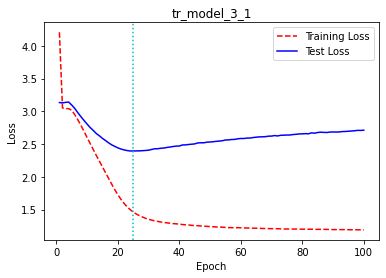

In [34]:
model_history_save_file_name ='model_history/history_model_3_1.npy'
model3_1 = define_model_3(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model3_1,loss_func,learning_rate)
plot_model(model3_1, to_file='model_images/tr_model_3_1_m.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model3_1, model_save_file_name,model_history_save_file_name)
graph_loss_vs_epochs(model3_1.history, 'loss_vs_epochs_images/tr_model_3_1_le.png', 'tr_model_3_1')

In [35]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', 'dataset/english-spanish-train-10000.txt','dataset/english-spanish-test-10000.txt'
units = 256
learning_rate = 0.003
loss_func='sparse_categorical_crossentropy'
epochs = 100
batch_size = 128
model_save_file_name='Models/tr_model_3_2.h5'

print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(8000, 5) (8000, 8) (2000, 5) (2000, 8)


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, None, 128)         290816    
_________________________________________________________________
bidirectional_17 (Bidirectio (None, 256)               198144    
_________________________________________________________________
repeat_vector_9 (RepeatVecto (None, 8, 256)            0         
_________________________________________________________________
time_distributed_14 (TimeDis (None, 8, 1024)           263168    
_________________________________________________________________
dropout_13 (Dropout)         (None, 8, 1024)           0         
_________________________________________________________________
time_distributed_15 (TimeDis (None, 8, 4510)           4622750   
Total params: 5,374,878
Trainable params: 5,374,878
Non-trainable params: 0
___________________________________________

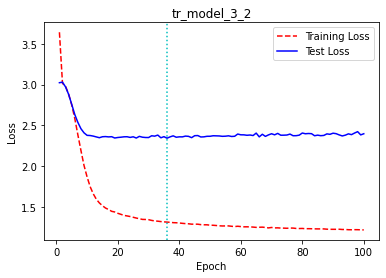

In [36]:
model_history_save_file_name ='model_history/history_model_3_2.npy'
model3_2 = define_model_3_2(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model3_2,loss_func,learning_rate)
plot_model(model3_2, to_file='model_images/tr_model_3_2_m.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model3_2, model_save_file_name,model_history_save_file_name)
graph_loss_vs_epochs(model3_2.history, 'loss_vs_epochs_images/tr_model_3_2_le.png', 'tr_model_3_2')

In [40]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', 'dataset/english-spanish-train-10000.txt','dataset/english-spanish-test-10000.txt'
units = 256
learning_rate = 0.003
loss_func='sparse_categorical_crossentropy'
epochs = 100
batch_size = 128
model_save_file_name='Models/tr_model_3_3.h5'

print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(8000, 5) (8000, 8) (2000, 5) (2000, 8)


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, None, 128)         290816    
_________________________________________________________________
bidirectional_19 (Bidirectio (None, 128)               98816     
_________________________________________________________________
repeat_vector_11 (RepeatVect (None, 8, 128)            0         
_________________________________________________________________
time_distributed_16 (TimeDis (None, 8, 4510)           581790    
Total params: 971,422
Trainable params: 971,422
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
63/63 - 18s - loss: 4.2797 - acc: 0.6309 - val_loss: 3.0797 - val_acc: 0.6417

Epoch 00001: val_loss improved from inf to 3.07966, saving model to Models\tr_model_3_3.h5
Epoch 2/100
63/63 - 15s - loss: 3.0209 - acc: 0.6411 - val

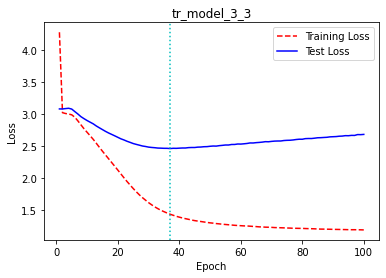

In [41]:
model_history_save_file_name ='model_history/history_model_3_3.npy'
model3_3 = define_model_3_3(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model3_3,loss_func,learning_rate)
plot_model(model3_3, to_file='model_images/tr_model_3_3_m.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model3_3, model_save_file_name,model_history_save_file_name)
graph_loss_vs_epochs(model3_3.history, 'loss_vs_epochs_images/tr_model_3_3_le.png', 'tr_model_3_3')

##### Visualization of all models test loss (val_loss)
The test loss does not go under 1.5, meaning it did not do so well, approximately reaching a 72% in accuracy for the test dataset. This may be because of the few data the model was built with.
We can see that model 1_2 had the lowes test loss.

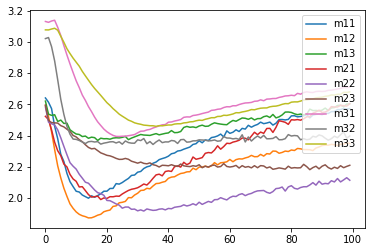

<Figure size 432x288 with 0 Axes>

In [47]:
loss_m11=load_history('model_history/history_model_1_1.npy')['val_loss']
loss_m12=load_history('model_history/history_model_1_2.npy')['val_loss']
loss_m13=load_history('model_history/history_model_1_3.npy')['val_loss']
loss_m21=load_history('model_history/history_model_2_1.npy')['val_loss']
loss_m22=load_history('model_history/history_model_2_2.npy')['val_loss']
loss_m23=load_history('model_history/history_model_2_3.npy')['val_loss']
loss_m31=load_history('model_history/history_model_3_1.npy')['val_loss']
loss_m32=load_history('model_history/history_model_3_2.npy')['val_loss']
loss_m33=load_history('model_history/history_model_3_3.npy')['val_loss']
x=range(100)
plt.plot(x,loss_m11)
plt.plot(x,loss_m12)
plt.plot(x,loss_m13)
plt.plot(x,loss_m21)
plt.plot(x,loss_m22)
plt.plot(x,loss_m23)
plt.plot(x,loss_m31)
plt.plot(x,loss_m32)
plt.plot(x,loss_m33)
plt.legend(['m11','m12','m13','m21','m22','m23','m31','m32','m33'], loc='upper right')
plt.show()
plt.savefig('loss_comparation/losses_t')

##### Visualization of all models test accuracy (val_acc)
The accuracy does not go improve more than 75%, meaning it did not do so well. This may be because of the few data the model was built with.
We can see that model 2_2 had the greatest test accuracy.

In [2]:
loss_m11=load_history('model_history/history_model_1_1.npy')['val_acc']
loss_m12=load_history('model_history/history_model_1_2.npy')['val_acc']
loss_m13=load_history('model_history/history_model_1_3.npy')['val_acc']
loss_m21=load_history('model_history/history_model_2_1.npy')['val_acc']
loss_m22=load_history('model_history/history_model_2_2.npy')['val_acc']
loss_m23=load_history('model_history/history_model_2_3.npy')['val_acc']
loss_m31=load_history('model_history/history_model_3_1.npy')['val_acc']
loss_m32=load_history('model_history/history_model_3_2.npy')['val_acc']
loss_m33=load_history('model_history/history_model_3_3.npy')['val_acc']
x=range(100)
plt.plot(x,loss_m11)
plt.plot(x,loss_m12)
plt.plot(x,loss_m13)
plt.plot(x,loss_m21)
plt.plot(x,loss_m22)
plt.plot(x,loss_m23)
plt.plot(x,loss_m31)
plt.plot(x,loss_m32)
plt.plot(x,loss_m33)
plt.legend(['m11','m12','m13','m21','m22','m23','m31','m32','m33'], loc='lower right')
plt.show()
#plt.savefig('accuracy_comparation/accuracy_t_m123')
print(min(loss_m12))

KeyboardInterrupt: 

#### Comparing Models:
##### Model 1:
We can see that we get worse results as the learning rate increases (from model 1 to 3), and having 2 GRU layers was better than having one LSTM an one SimpleRNN in the bidirectional layers.

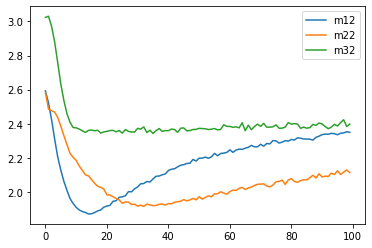

<Figure size 432x288 with 0 Axes>

In [51]:
loss_m11=load_history('model_history/history_model_1_2.npy')['val_loss']
loss_m12=load_history('model_history/history_model_2_2.npy')['val_loss']
loss_m13=load_history('model_history/history_model_3_2.npy')['val_loss']

x=range(100)
plt.plot(x,loss_m11)
plt.plot(x,loss_m12)
plt.plot(x,loss_m13)

plt.legend(['m12','m22','m32'], loc='upper right')
plt.show()
plt.savefig('loss_comparation/losses_t_bms123')

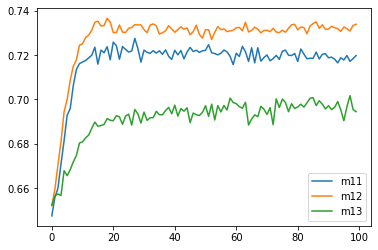

<Figure size 432x288 with 0 Axes>

In [116]:
loss_m11=load_history('model_history/history_model_1_1.npy')['val_acc']
loss_m12=load_history('model_history/history_model_1_2.npy')['val_acc']
loss_m13=load_history('model_history/history_model_1_3.npy')['val_acc']

x=range(100)
plt.plot(x,loss_m11)
plt.plot(x,loss_m12)
plt.plot(x,loss_m13)

plt.legend(['m11','m12','m13'], loc='lower right')
plt.show()
plt.savefig('accuracy_comparation/accuracy_t_m1')

##### Model 2:
We can see that version 2 reaches a minimum val loss and gets stuck. This was the version in which a dropout layer between each of the other layers was added in order to reduce overfittin, but it did not improve the val_loss gotten in version 1. 
Using a SimpleRNN with relu instead of GRU also had a worse impact (version 3)

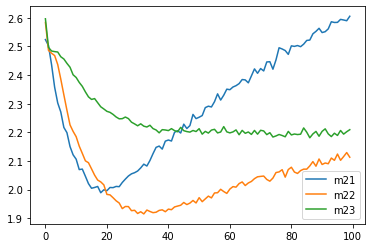

<Figure size 432x288 with 0 Axes>

In [113]:
loss_m21=load_history('model_history/history_model_2_1.npy')['val_loss']
loss_m22=load_history('model_history/history_model_2_2.npy')['val_loss']
loss_m23=load_history('model_history/history_model_2_3.npy')['val_loss']
x=range(100)
plt.plot(x,loss_m21)
plt.plot(x,loss_m22)
plt.plot(x,loss_m23)
plt.legend(['m21','m22','m23'], loc='lower right')
plt.show()
plt.savefig('loss_comparation/losses_t_m2')

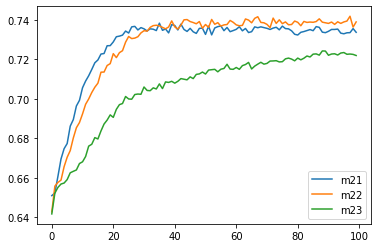

<Figure size 432x288 with 0 Axes>

In [114]:
loss_m21=load_history('model_history/history_model_2_1.npy')['val_acc']
loss_m22=load_history('model_history/history_model_2_2.npy')['val_acc']
loss_m23=load_history('model_history/history_model_2_3.npy')['val_acc']
x=range(100)
plt.plot(x,loss_m21)
plt.plot(x,loss_m22)
plt.plot(x,loss_m23)
plt.legend(['m21','m22','m23'], loc='lower right')
plt.show()
plt.savefig('accuracy_comparation/accuracy_t_m2')

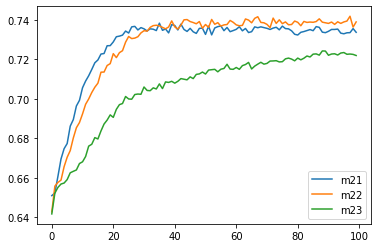

<Figure size 432x288 with 0 Axes>

In [103]:
loss_m21=load_history('model_history/history_model_2_1.npy')['val_acc']
loss_m22=load_history('model_history/history_model_2_2.npy')['val_acc']
loss_m23=load_history('model_history/history_model_2_3.npy')['val_acc']
x=range(100)
plt.plot(x,loss_m21)
plt.plot(x,loss_m22)
plt.plot(x,loss_m23)
plt.legend(['m21','m22','m23'], loc='lower right')
plt.show()
plt.savefig('accuracy_comparation/accuracy_t_m2')

##### Model 3:
We can see that having a simpler architecture (with just one bidirectional layer) did not make a difference. It looks like LSTM instead of GRU (version 3 vs version 1) makes the network learn slower, as val_loss decreases slower, but id does not improve performance.
Also, adding a fully connected layer and dropout made the test loss reduce quicker but then stayed stuck (version 2).

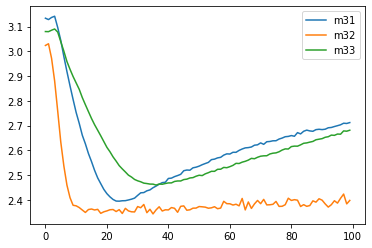

<Figure size 432x288 with 0 Axes>

In [49]:
loss_m31=load_history('model_history/history_model_3_1.npy')['val_loss']
loss_m32=load_history('model_history/history_model_3_2.npy')['val_loss']
loss_m33=load_history('model_history/history_model_3_3.npy')['val_loss']
x=range(100)
plt.plot(x,loss_m31)
plt.plot(x,loss_m32)
plt.plot(x,loss_m33)
plt.legend(['m31','m32','m33'], loc='upper right')
plt.show()
plt.savefig('loss_comparation/losses_t_m3')

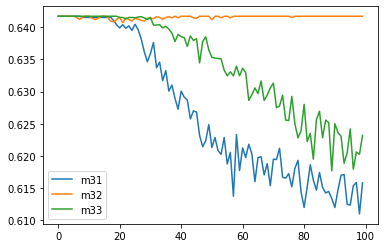

<Figure size 432x288 with 0 Axes>

In [101]:
loss_m31=load_history('model_history/history_model_3_1.npy')['val_acc']
loss_m32=load_history('model_history/history_model_3_2.npy')['val_acc']
loss_m33=load_history('model_history/history_model_3_3.npy')['val_acc']
x=range(100)
plt.plot(x,loss_m31)
plt.plot(x,loss_m32)
plt.plot(x,loss_m33)
plt.legend(['m31','m32','m33'], loc='lower left')
plt.show()
plt.savefig('accuracy_comparation/accuracy_t_m3')

#### Comparing with ONE HOT ENCODING OUTPUT:
    Now that we have seen that model 1 version 2 is the best model, we will compare it with its twin version having the output set as one hot encoding instead of encoded numbered sequences.

In [ ]:
def define_model_1(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
	model = Sequential()
	model.add(Embedding(src_vocab, n_units, input_length=src_timesteps, mask_zero=True)) 
	model.add(Bidirectional(GRU(n_units)))
	model.add(RepeatVector(tar_timesteps))
	model.add(Bidirectional(GRU(n_units, return_sequences=True)))
	#model.add(LSTM(n_units, return_sequences=True))
	model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
	return model

In [112]:
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(8000, 5) (8000, 8, 4510) (2000, 5) (2000, 8, 4510)


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 5, 128)            290816    
_________________________________________________________________
bidirectional_22 (Bidirectio (None, 256)               198144    
_________________________________________________________________
repeat_vector_13 (RepeatVect (None, 8, 256)            0         
_________________________________________________________________
bidirectional_23 (Bidirectio (None, 8, 256)            296448    
_________________________________________________________________
time_distributed_18 (TimeDis (None, 8, 4510)           1159070   
Total params: 1,944,478
Trainable params: 1,944,478
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
250/250 - 46s - loss: 3.1029 - acc: 0.6416 - val_loss: 2.5802 - val_acc: 0.6503

Epoch 00001

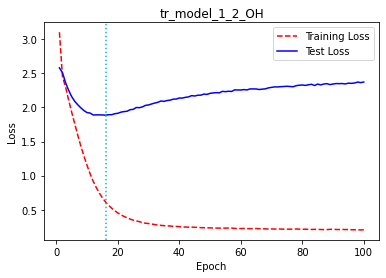

In [107]:
loss_func='categorical_crossentropy'
model_history_save_file_name ='model_history/history_model_1_2_OH.npy'
model1_2_OH = define_model_1(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model1_2_OH,loss_func,learning_rate)
plot_model(model1_2_OH, to_file='model_images/tr_model_1_2_OH_m.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model1_2_OH, model_save_file_name,model_history_save_file_name)
graph_loss_vs_epochs(model1_2_OH.history, 'loss_vs_epochs_images/tr_model_1_2_OH_le.png', 'tr_model_1_2_OH')

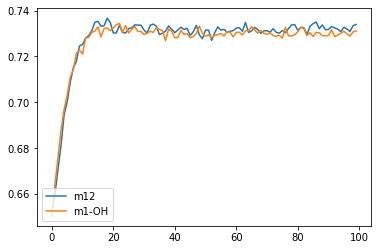

<Figure size 432x288 with 0 Axes>

In [109]:
loss_m12=load_history('model_history/history_model_1_2.npy')['val_acc']
loss_m12_OH=load_history('model_history/history_model_1_2_OH.npy')['val_acc']
x=range(100)
plt.plot(x,loss_m12)
plt.plot(x,loss_m12_OH)
plt.legend(['m12','m1-OH'], loc='lower left')
plt.show()
plt.savefig('accuracy_comparation/accuracy_t_m121_vs_OH')

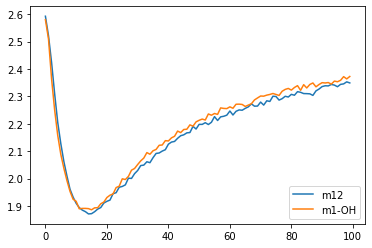

<Figure size 432x288 with 0 Axes>

In [115]:
loss_m12=load_history('model_history/history_model_1_2.npy')['val_loss']
loss_m12_OH=load_history('model_history/history_model_1_2_OH.npy')['val_loss']
x=range(100)
plt.plot(x,loss_m12)
plt.plot(x,loss_m12_OH)
plt.legend(['m12','m1-OH'], loc='lower right')
plt.show()
plt.savefig('loss_comparation/loss_t_m121_vs_OH')

As we can see, the performance is almost nearly the same, therefore we conclude that both representations for output perform equally and there is no best.